# England Premier League



In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# The file path toward the EPL data (scores, attendances, weather)
epl_path = "../final-resources/EPL/"
data_file = os.path.join(epl_path, "EPL_scores_att_weather.csv")
#stadium_file = os.path.join("../Resources/", "England_stadiums.csv")

In [5]:
epl_all_data_df = pd.read_csv(data_file)
epl_all_data_df.head()

,Unnamed: 0,Div,Date,Time,HomeTeam,AwayTeam,HomeScore,AwayScore,Result,HomeTeam ID,AwayTeam ID,City,Team ID,Opponent,Attendance,Latitude,Longitude,Avg Temp (in F)
0,0,E0,2019-08-09,20:00,Liverpool,Norwich,4,1,H,EPL9,EPL13,Liverpool,EPL9,Norwich City,53333.0,53.408371,-2.991573,69
1,1,E0,2019-08-10,12:30,West Ham,Man City,0,5,A,EPL18,EPL10,London,EPL18,Manchester City,59870.0,51.507351,-0.127758,68
2,2,E0,2019-08-10,15:00,Watford,Brighton,0,3,A,EPL17,EPL3,Watford,EPL17,Brighton & Hove Albion,20245.0,51.656489,-0.390320,64
3,3,E0,2019-08-10,17:30,Tottenham,Aston Villa,3,1,H,EPL16,EPL1,London,EPL16,Aston Villa,60407.0,51.507351,-0.127758,68
4,4,E0,2019-08-10,15:00,Crystal Palace,Everton,0,0,D,EPL6,EPL7,London,EPL6,Everton,25151.0,51.507351,-0.127758,68


### Cleaning table

In [8]:
epl_all_data_df = epl_all_data_df.drop(columns=["Unnamed: 0"]).fillna(0)

## The league summary

In [62]:
# Summary of scores data
cols = ["Date", 
    "HomeTeam ID", 
    "HomeScore",
    "AwayTeam ID",
    "AwayScore", 
    "Result"]
epl_all_data_df[cols].describe()

,HomeScore,AwayScore
count,351.000000,351.000000
mean,1.518519,1.196581
std,1.239389,1.206454
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,8.000000,9.000000


In [70]:
# The total number of matches of EPL in this season
total = len(epl_all_data_df['Date'])

# The number of matches after COVID-19
after = len(epl_all_data_df.loc[epl_all_data_df["Date"]>"2020-04-01"])

print(f"The number of matches of EPL until {epl_all_data_df['Date'].at[total -1]} is {total}")
print(f"The number of matches of EPL after COVID-19 is {after}")

The number of matches of EPL until 2020-07-13 is 351
The number of matches of EPL after COVID-19 is 62


In [66]:
# Summary of attendances data
epl_all_data_df["Attendance"].describe()

count      351.000000
mean     31438.786325
std      21452.530864
min          0.000000
25%      19711.500000
50%      31108.000000
75%      51314.000000
max      73737.000000
Name: Attendance, dtype: float64

In [67]:
# Summary of weather data (temperature)
epl_all_data_df["Avg Temp (in F)"].describe()

count    351.000000
mean      52.789174
std       10.175095
min       35.000000
25%       44.000000
50%       50.000000
75%       61.000000
max       82.000000
Name: Avg Temp (in F), dtype: float64

## Home scores vs. Away scores 


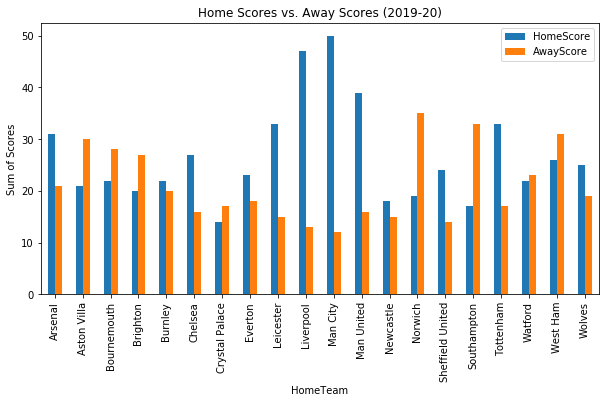

In [68]:
# Select the columns to plot
cols = ["HomeTeam", "HomeScore","AwayTeam", "AwayScore"]

# Set the dataframe to plot
scores_df = epl_all_data_df[cols]

# Plot bar graphs of Home scores and Away scores of each team
scores_gp_team = scores_df.groupby("HomeTeam")
scores_sum = scores_gp_team[["HomeScore","AwayScore"]].sum()
scores_bar = scores_sum.plot.bar(width=0.5,figsize=(10, 5), rot=90)
scores_bar.set_title("Home Scores vs. Away Scores (2019-20)")
scores_bar.set_ylabel("Sum of Scores")
plt.show()

## Home Attendances vs. Away Attendances

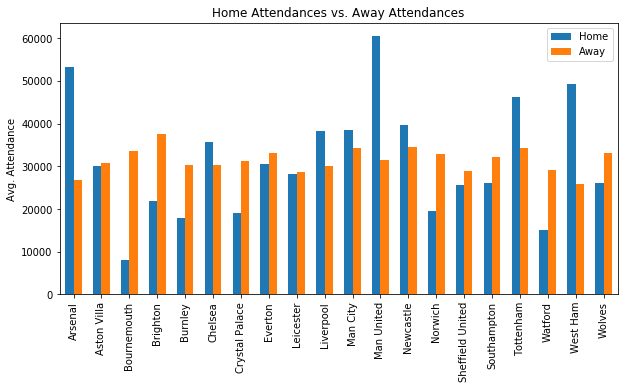

In [69]:
# Collect columns
cols = ["Date", "HomeTeam","AwayTeam", "Attendance"]
att_df = epl_all_data_df[cols]

# Attendances about Hometeam
att_gp_home = att_df.groupby("HomeTeam")
att_home = att_gp_home["Attendance"].mean()

# Attendances about Awayteam
att_gp_away = att_df.groupby("AwayTeam")
att_away = att_gp_away["Attendance"].mean()

# Bar plot
xticks = att_gp_home.indices.keys()
bar_width = 0.6
xval = np.arange(len(xticks))*2

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(xval-bar_width/2, att_home, width=bar_width, label="Home")
ax.bar(xval+bar_width/2, att_away, width=bar_width, label="Away")
ax.set_xlim(-1, 2*len(xticks)-1)
ax.set_xticks(xval)
ax.set_xticklabels(xticks, rotation='vertical')
ax.set_ylabel("Avg. Attendance")
ax.set_title("Home Attendances vs. Away Attendances")
ax.legend()
plt.show()

## Attendances vs. Scores


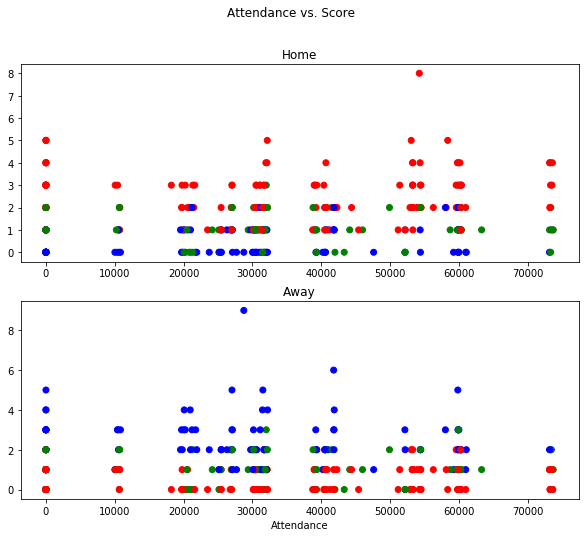

In [91]:
# Collect columns
cols = ["HomeTeam", "HomeScore", "AwayScore", "Result", "Attendance"]
epl_df = epl_all_data_df[cols]
colors = epl_df["Result"].replace(["H","A","D"], ["r","b","g"])
# Scatter plot
#xval = epl_df["Attendance"] / 1000
xval = epl_df["Attendance"]
yval = [epl_df["HomeScore"], epl_df["AwayScore"]]
fig,(ax1,ax2)= plt.subplots(2, figsize=(10,8))
ax1.scatter(xval, yval[0], c=colors,label="Home")
#ax1.set_xlabel("Attendance/1000")
ax1.set_title("Home")
ax2.scatter(xval, yval[1], c=colors,label="Away")
ax2.set_title("Away")
ax2.set_xlabel("Attendance")
fig.suptitle("Attendance vs. Score")
plt.show()

## Temperature vs. Scores

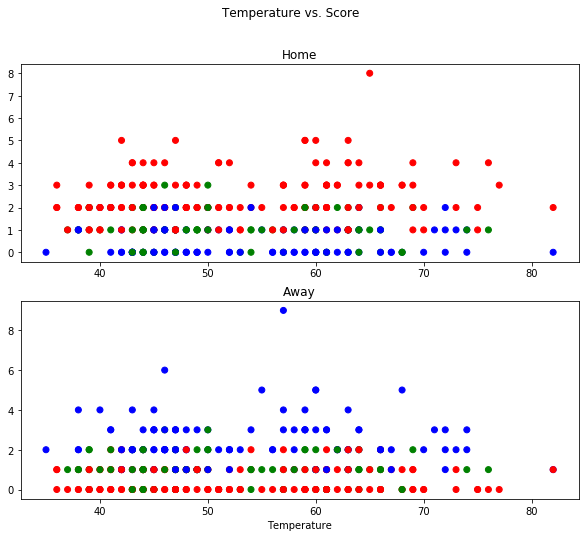

In [99]:
# Collect columns
cols = ["HomeScore", "AwayScore", "Result", "Avg Temp (in F)"]
temp_df = epl_all_data_df[cols]
colors = temp_df["Result"].replace(["H","A","D"], ["r","b","g"])

# Scatter plot
xval = temp_df["Avg Temp (in F)"]
yval = [temp_df["HomeScore"], temp_df["AwayScore"]]
fig,(ax1,ax2)= plt.subplots(2, figsize=(10,8))
ax1.scatter(xval, yval[0], c=colors,label="Home")
ax1.set_title("Home")
ax2.scatter(xval, yval[1], c=colors,label="Away")
ax2.set_title("Away")
ax2.set_xlabel("Temperature")
fig.suptitle("Temperature vs. Score")
plt.show()

## Dates vs. Scores

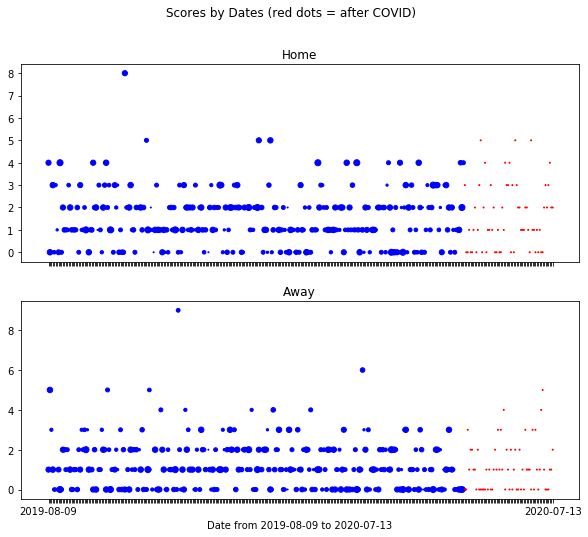

In [101]:
## Date and score
cols = ["Date", "HomeScore", "AwayScore", "Attendance"]
date_score_df = epl_all_data_df[cols]

# Scatter plot with different size
xval = np.arange(total)
xticks = ["2019-08-09"]+[' ']*(total-2)+["2020-07-13"]
#xval = date_score_df["Date"]
yval1 = date_score_df["HomeScore"]
yval2 = date_score_df["AwayScore"]
scalar = date_score_df["Attendance"]/2000
scalar = scalar.replace(0,1)


# Set the color of the dots before covid as blue
# and the dots after covid as red
color = ["b"]*(total-after) + ["r"]*after

fig, (ax1,ax2) = plt.subplots(2, sharex=True, figsize=(10,8))
ax1.scatter(xval, yval1, s=scalar, c=color)
ax1.set_xticks(xval)
ax1.set_xticklabels(xticks)
ax1.set_title("Home")
ax2.scatter(xval, yval2, s=scalar, c=color)
ax2.set_xticks(xval)
ax2.set_xticklabels(xticks)
ax2.set_title("Away")
ax2.set_xlabel("Date from 2019-08-09 to 2020-07-13")
fig.suptitle("Scores by Dates (red dots = after COVID)")
plt.show()